# Week1

## Exploratory graph part1 (1d-Summaries)

In [11]:
if (!file.exists("./data")){
    dir.create("./data")
}
download.file("https://raw.githubusercontent.com/jtleek/modules/master/04_ExploratoryAnalysis/exploratoryGraphs/data/avgpm25.csv",destfile ="./data/avgpm25.csv" )

In [12]:
pollution <- read.csv("./data/avgpm25.csv",colClasses= c("numeric","character","factor","numeric","numeric"))

In [13]:
head(pollution)

pm25,fips,region,longitude,latitude
9.771185,01003,east,-87.74826,30.59278
9.993817,01027,east,-85.84286,33.26581
10.688618,01033,east,-87.72596,34.73148
11.337424,01049,east,-85.79892,34.45913
12.119764,01055,east,-86.03212,34.01860
10.827805,01069,east,-85.35039,31.18973


### Six Number Summary

In [15]:
summary(pollution$pm25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.383   8.549  10.047   9.836  11.356  18.441 

### Boxplot

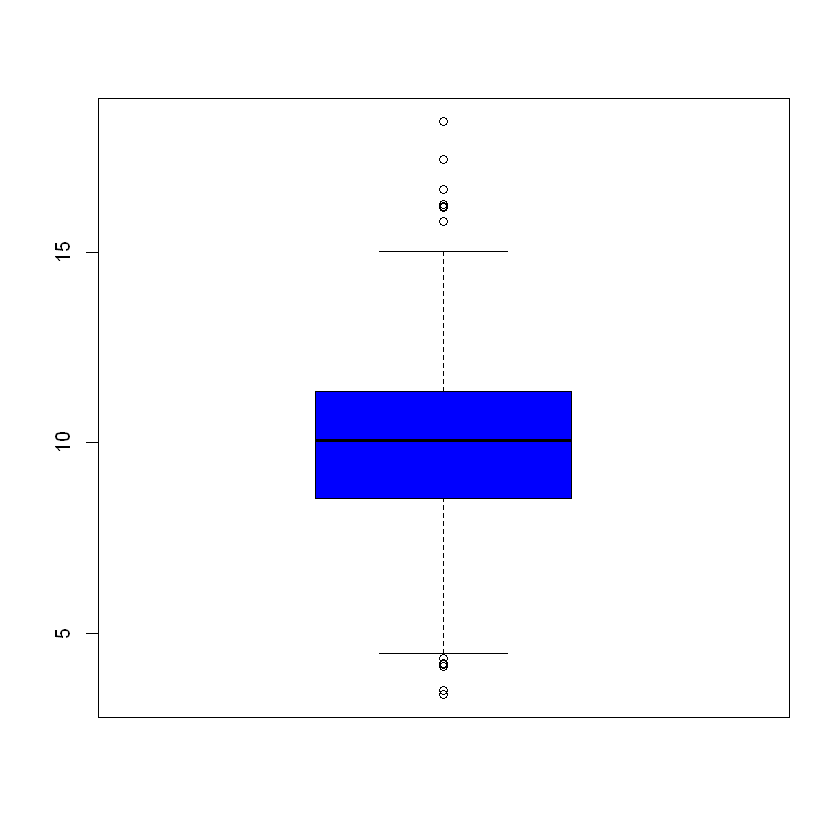

In [16]:
boxplot(pollution$pm25,col = "blue")

### Histogram

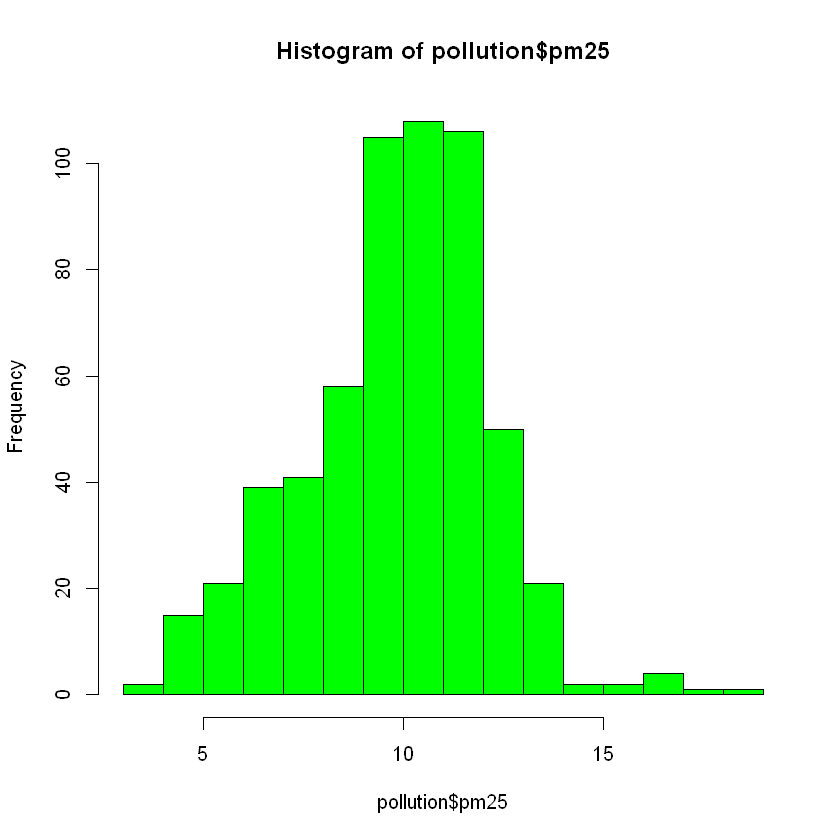

In [20]:
hist(pollution$pm25,col="green")

#### Rug

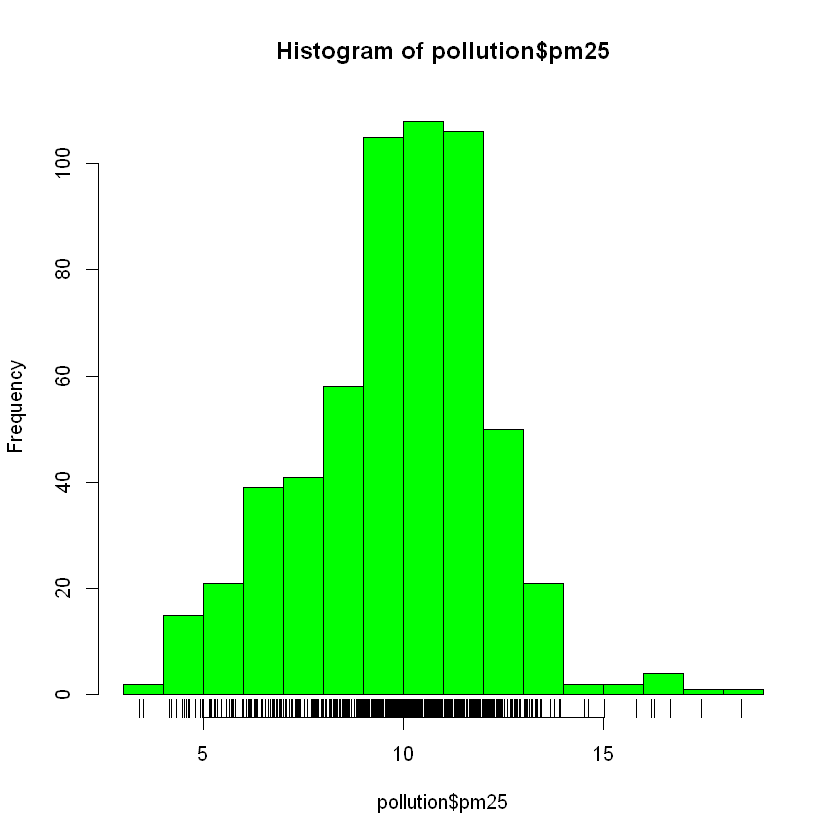

In [22]:
hist(pollution$pm25,col="green")
rug(pollution$pm25)

#### Breaks

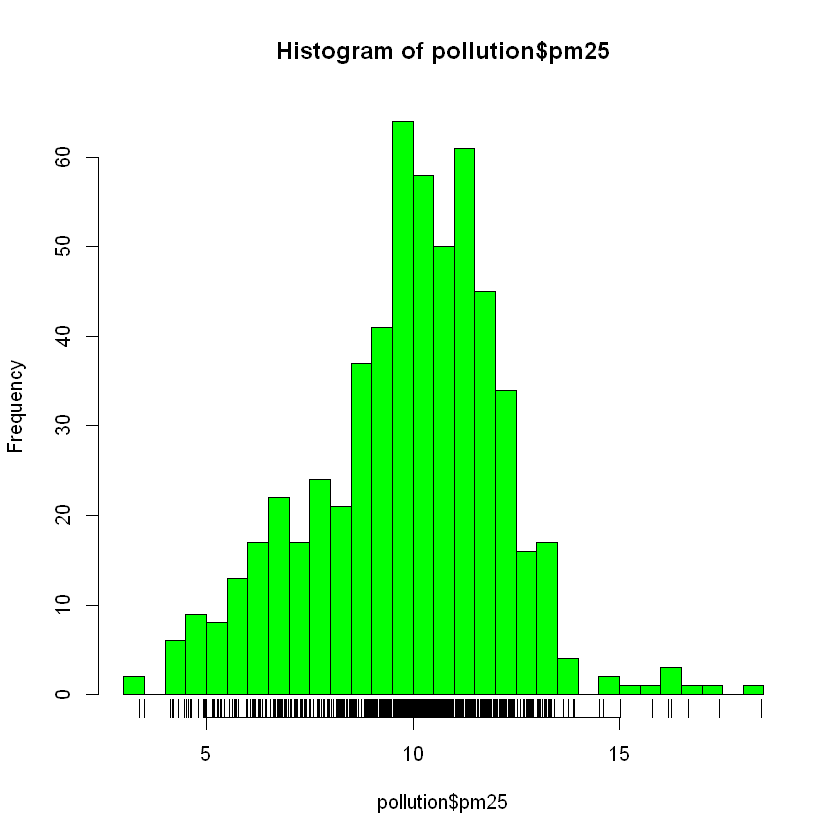

In [25]:
hist(pollution$pm25,col="green",breaks=50)
rug(pollution$pm25)

### Overlaying Features

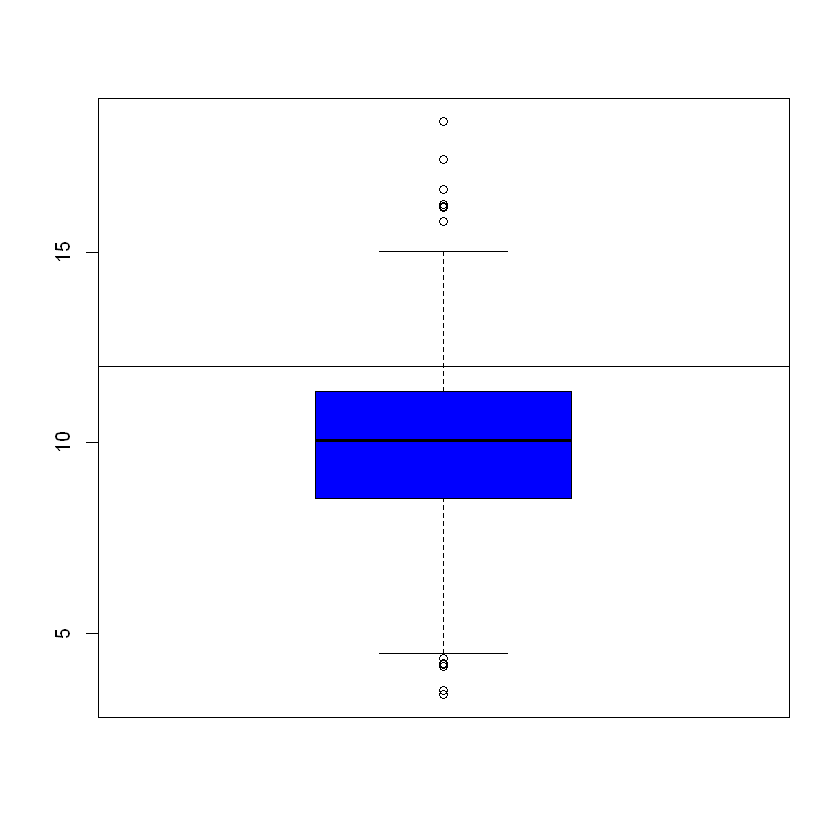

In [26]:
boxplot(pollution$pm25,col = "blue")
abline(h=12)

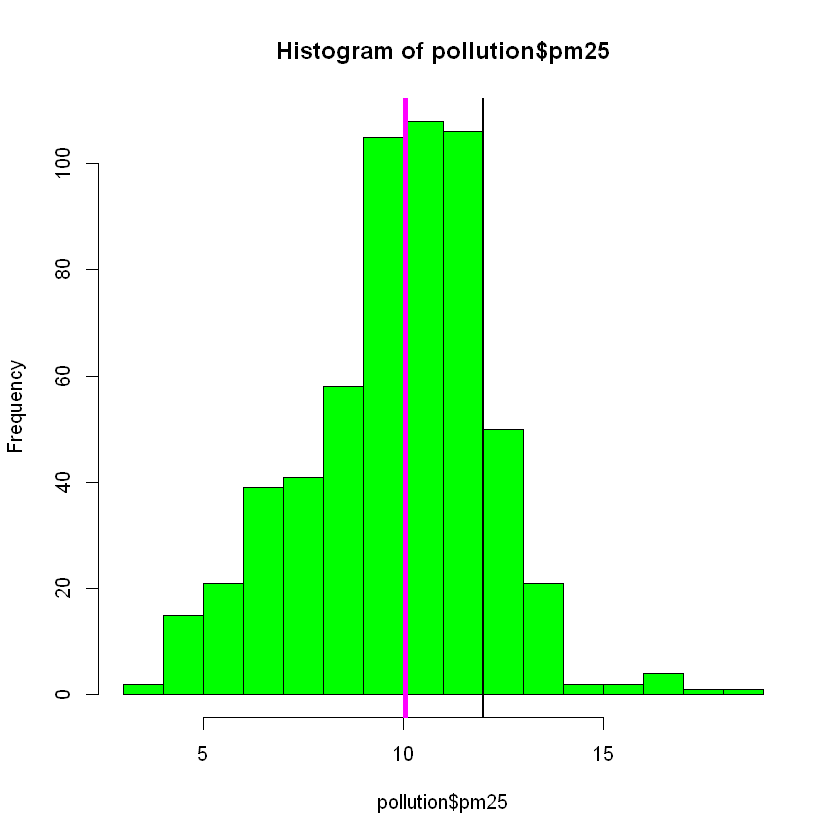

In [29]:
hist(pollution$pm25,col = "green")
abline(v=12,lwd=2)
abline(v=median(pollution$pm25),col="magenta",lwd=4)

### Barplot

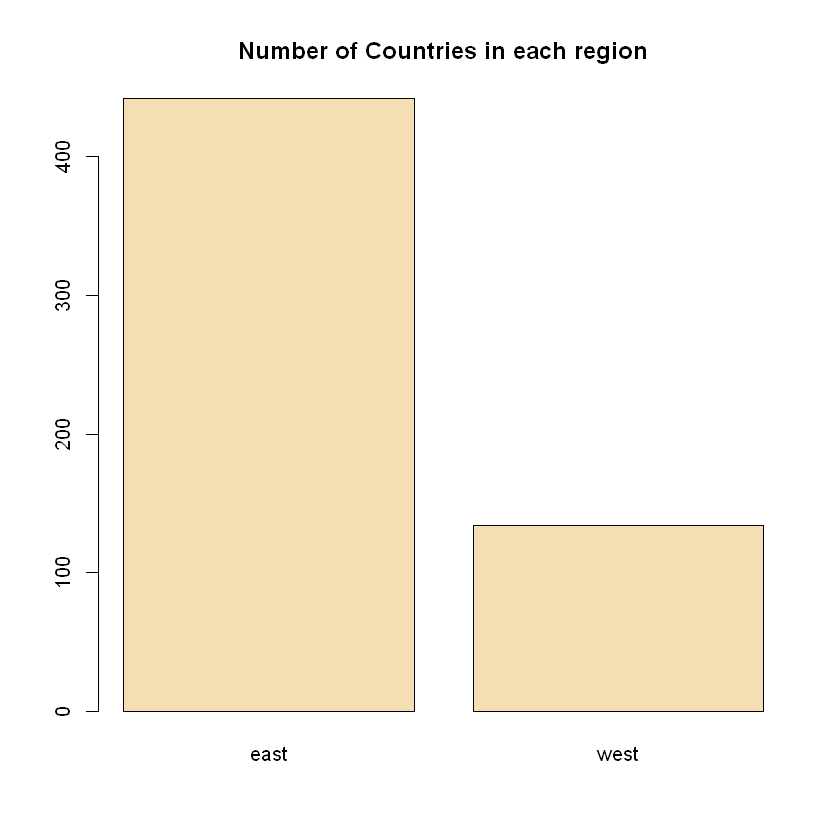

In [34]:
barplot(table(pollution$region),col="wheat",
       main="Number of Countries in each region")

## Exploratory Graphs (part2) (2d- summary)

### Multiple Boxplots

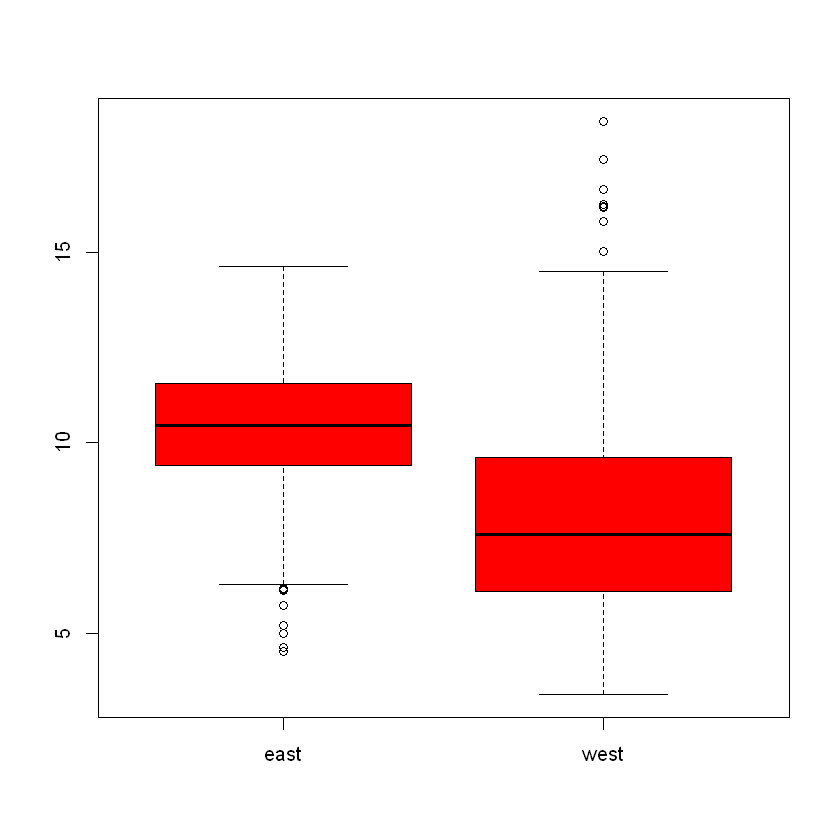

In [36]:
boxplot(pm25~region , data=pollution,col = "red")

### Multiple Histograms

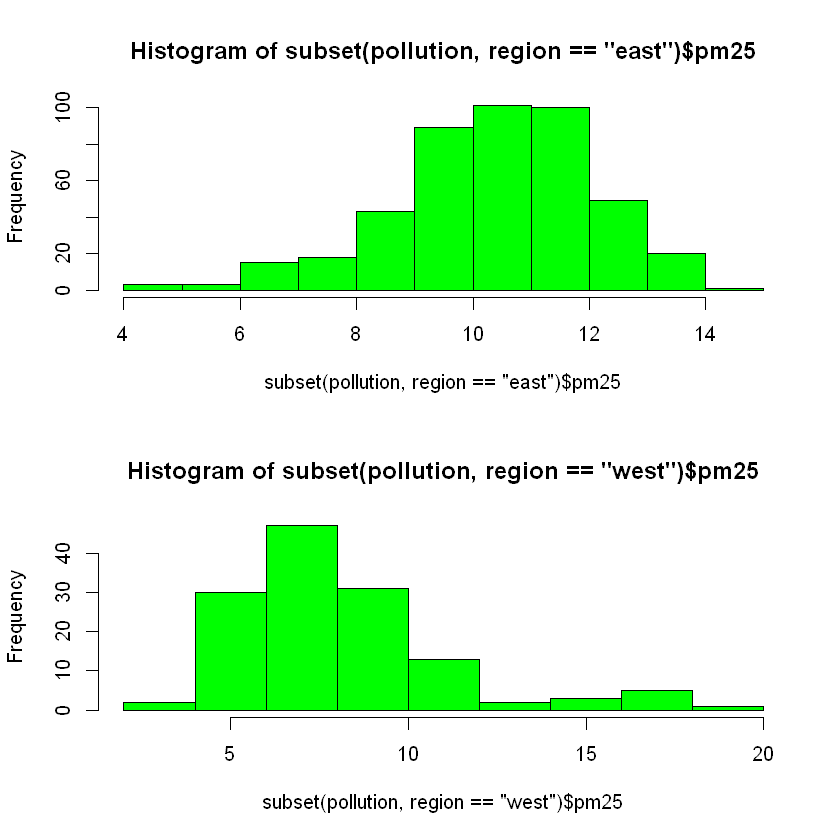

In [37]:
par(mfrow = c(2,1))
hist(subset(pollution,region=="east")$pm25,col="green")
hist(subset(pollution,region=="west")$pm25,col="green")

### Scatterplot

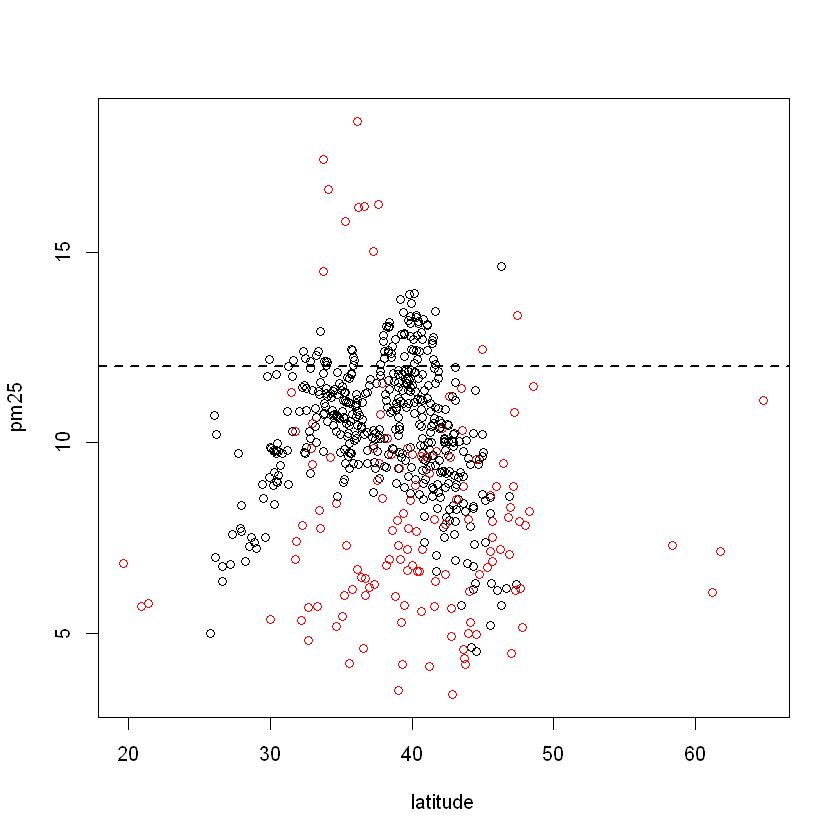

In [42]:
with (pollution,plot(latitude,pm25,col=region))
abline(h=12,lwd=2,lty=2)

### Multiple Scatterplots

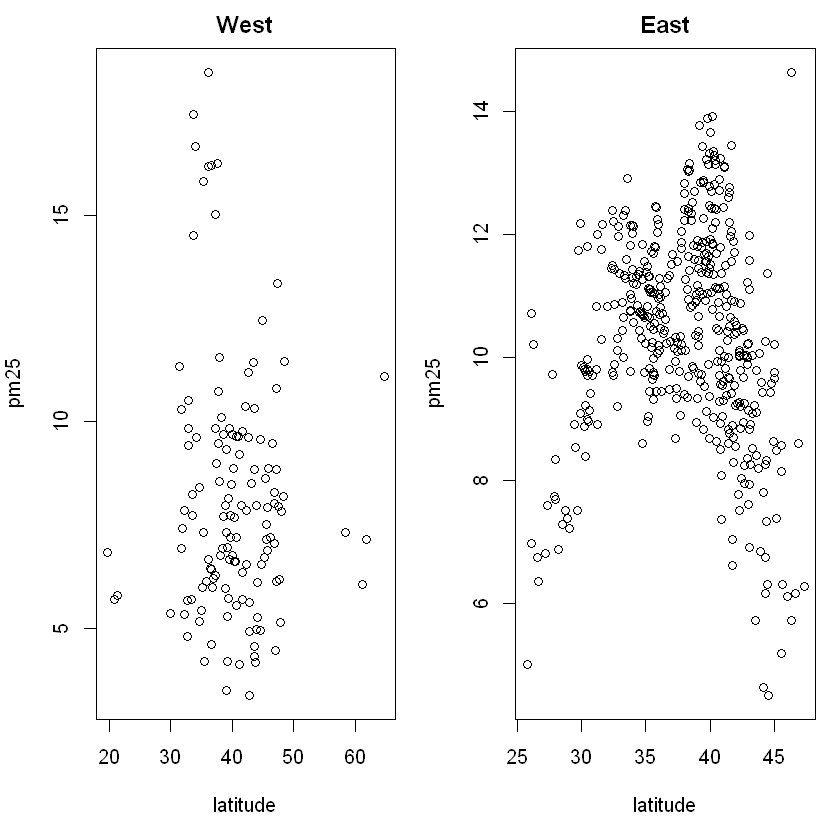

In [48]:
par(mfrow = c(1,2),mar=c(5,4,2,1))
with(subset(pollution,region=="west"),plot(latitude,pm25,main="West"))
with(subset(pollution,region=="east"),plot(latitude,pm25,main="East"))

## Plotting Systems in R

### Base Plot

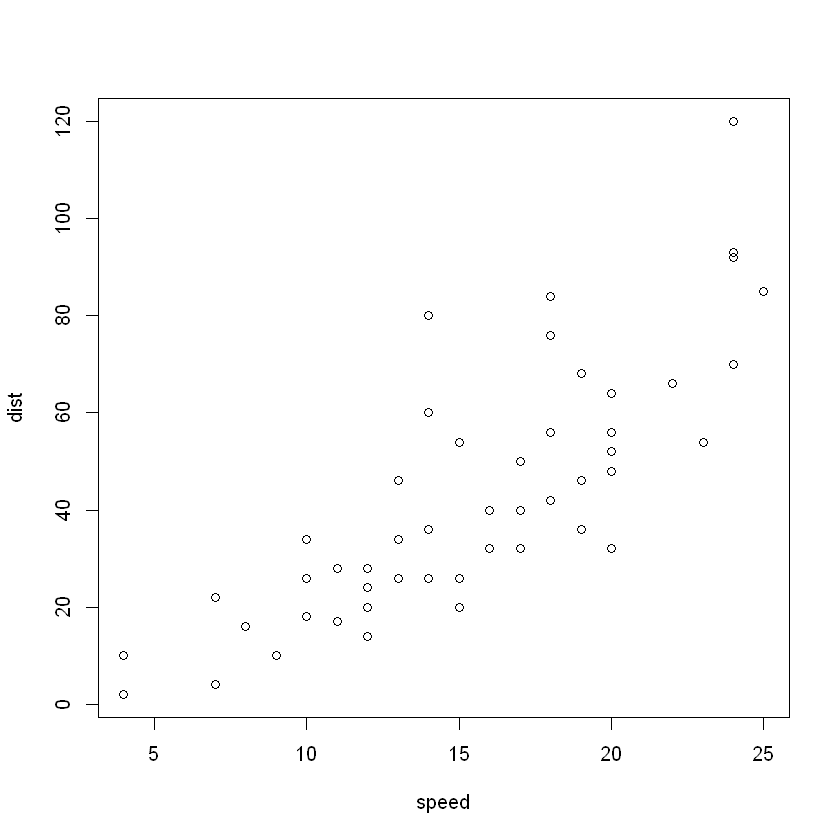

In [49]:
library(datasets)
data(cars)
with(cars,plot(speed,dist))

### Lattice Plot

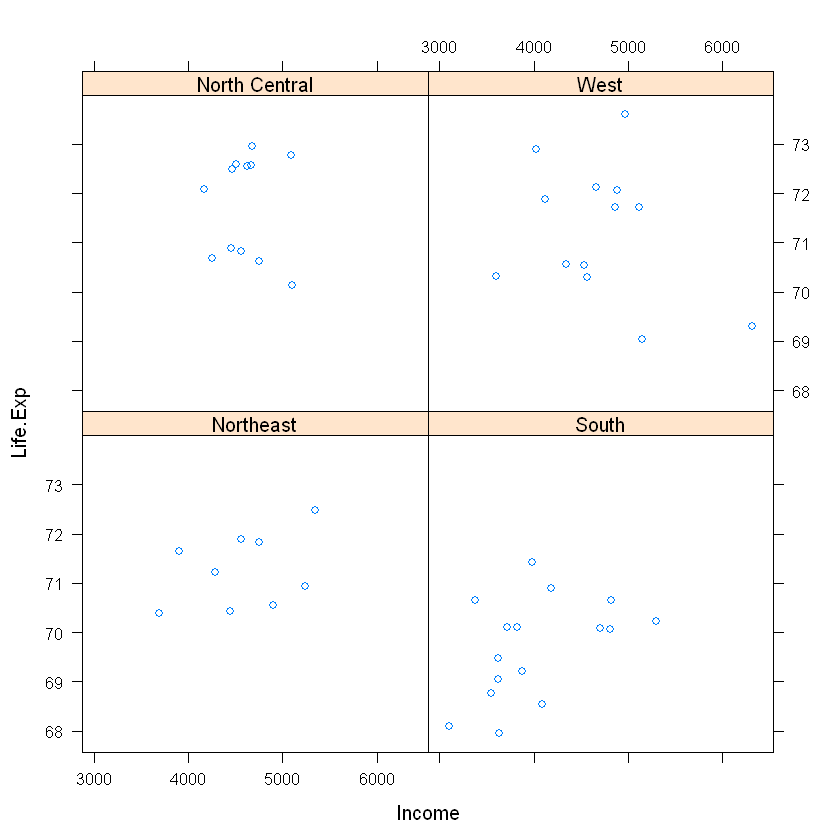

In [53]:
library(lattice)
state <- data.frame(state.x77,region=state.region)
xyplot(Life.Exp ~Income|region,data=state,layout=c(2,2))

### ggplot2 package

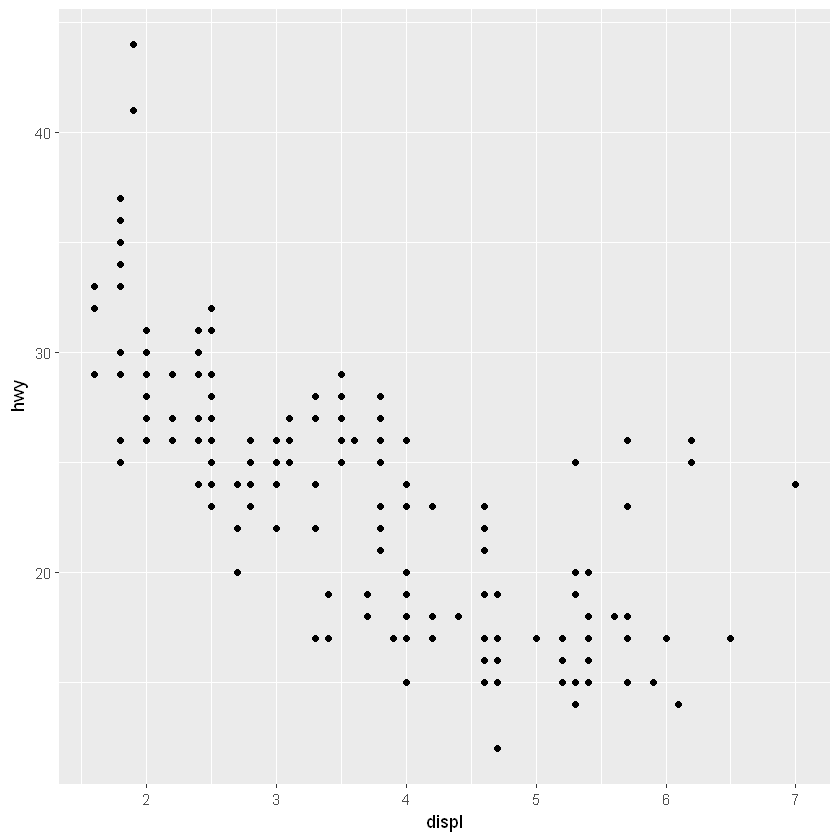

In [55]:
library(ggplot2)
data(mpg)
qplot(displ,hwy,data=mpg)

## Base Plotting Subsystem in R part1

### Simple Base Graphics: Histogram

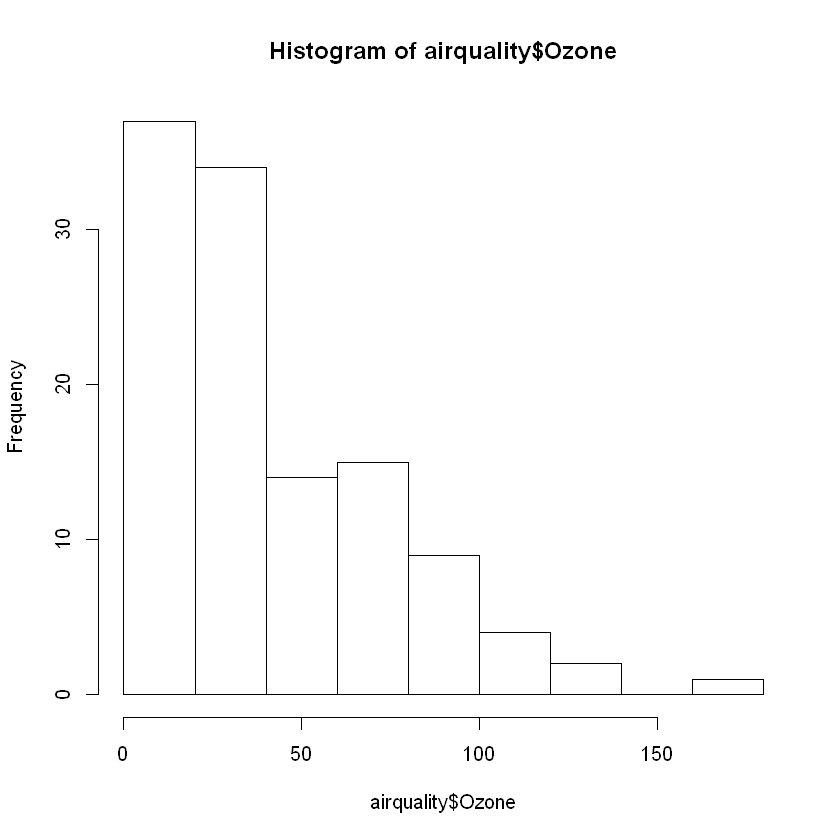

In [56]:
library(datasets)
hist(airquality$Ozone)

### Simple Base Graphics: ScatterPlot

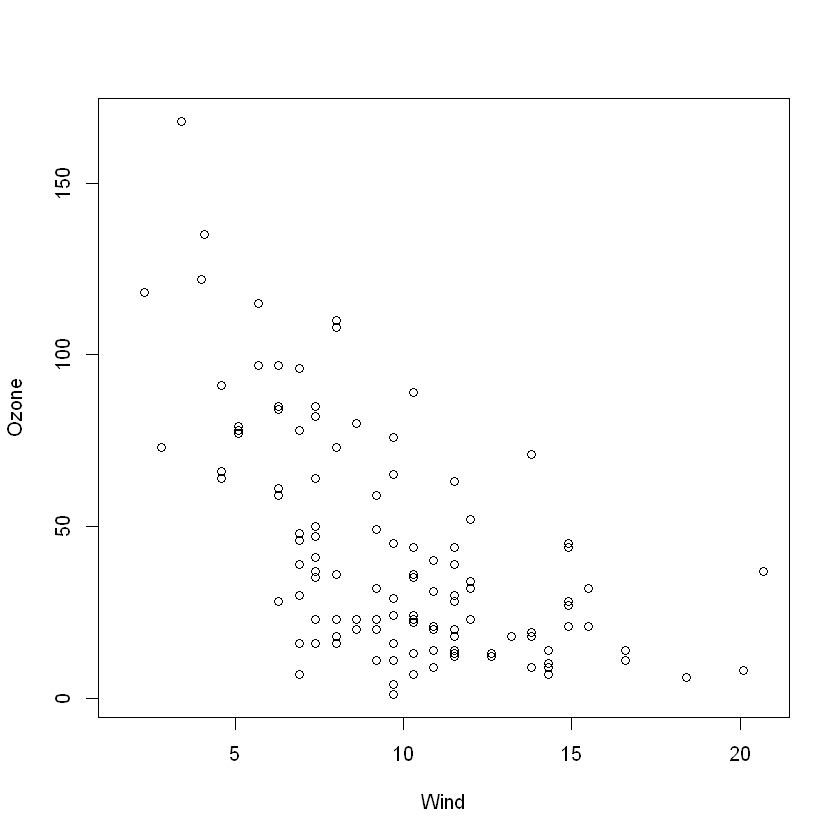

In [58]:
library(datasets)
with(airquality,plot(Wind,Ozone))

### Simple Base Graphics: Boxplot part_1

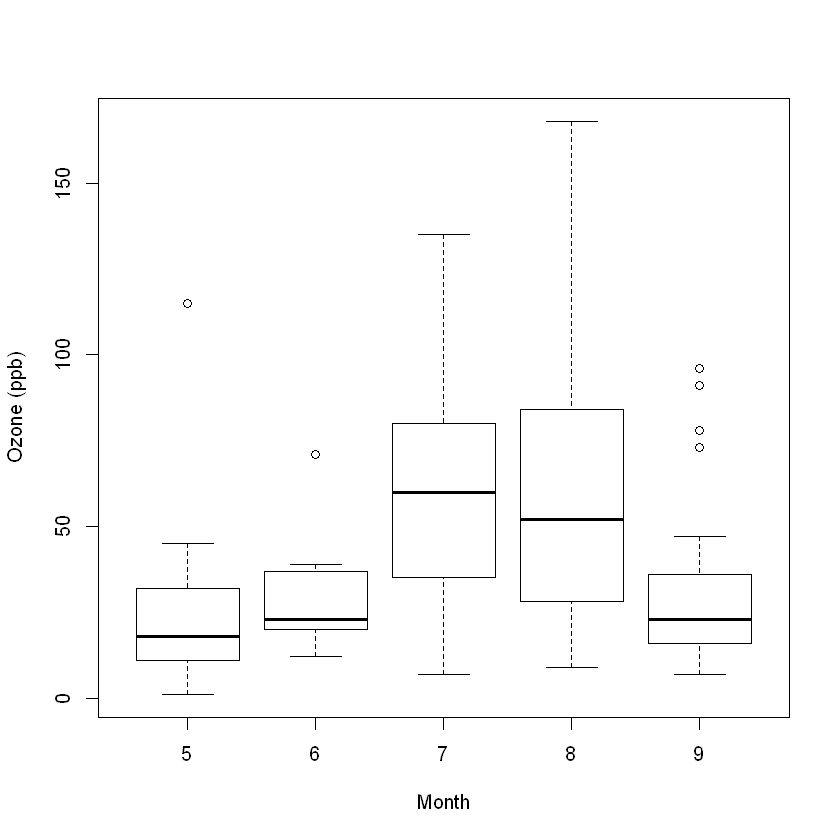

In [60]:
library(datasets)
airquality <- transform(airquality,Month = factor(Month))
boxplot(Ozone~Month,airquality,xlab="Month",ylab="Ozone (ppb)")

In [2]:
par("lty")

[1] "solid"

In [3]:
par("col")

[1] "black"

In [4]:
par("pch")

[1] 1

In [5]:
par("bg")

[1] "white"

In [6]:
par("mar")

[1] 5.1 4.1 4.1 2.1

In [7]:
par("mfrow")

[1] 1 1

## Base Plotting Subsystem in R part2

### Base Plot with Annotation

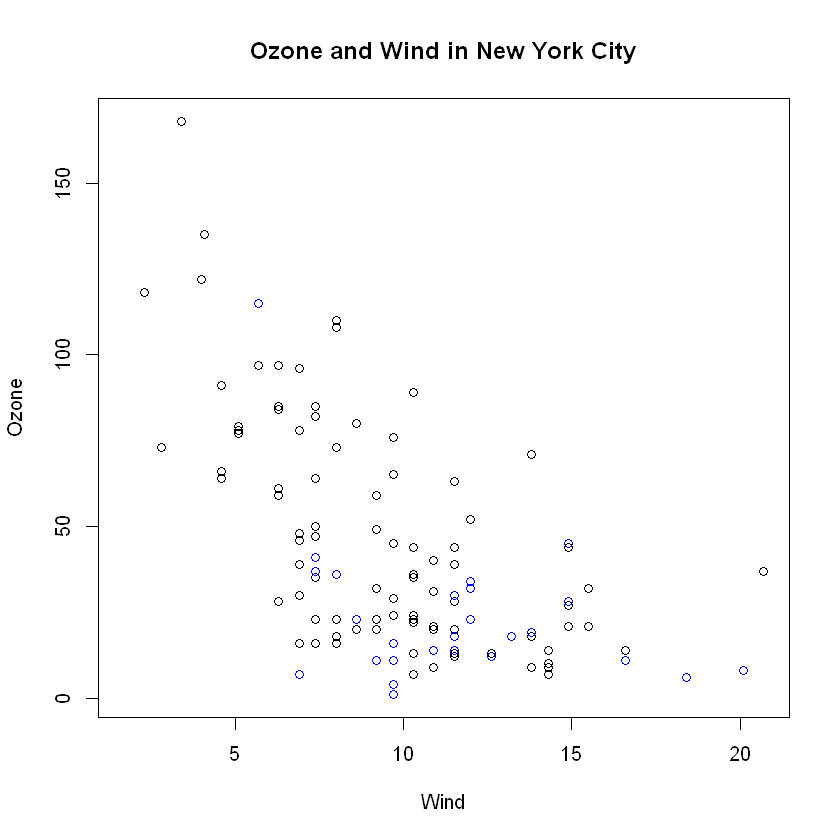

In [9]:
with(airquality,plot(Wind,Ozone,main="Ozone and Wind in New York City"))
with(subset(airquality,Month==5),points(Wind,Ozone,col="blue"))

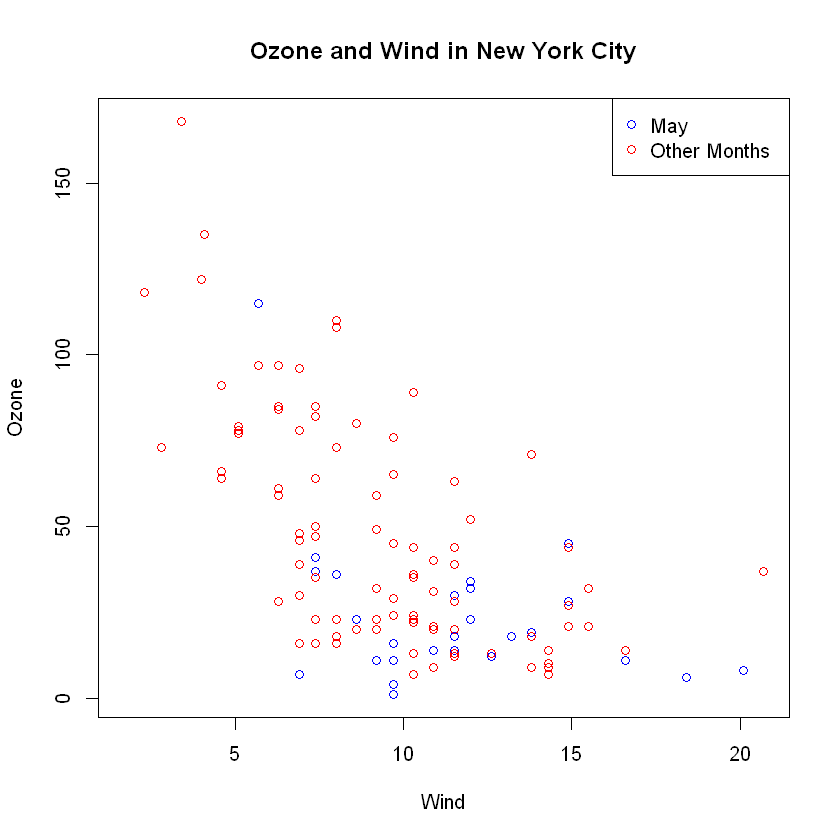

In [12]:
with(airquality,plot(Wind,Ozone,main="Ozone and Wind in New York City",type="n"))
with(subset(airquality,Month==5),points(Wind,Ozone,col="blue"))
with(subset(airquality,Month!=5),points(Wind,Ozone,col="red"))
legend("topright",pch = 1,col=c("blue","red"),legend=c("May","Other Months"))

### Base Plot with Regression Line

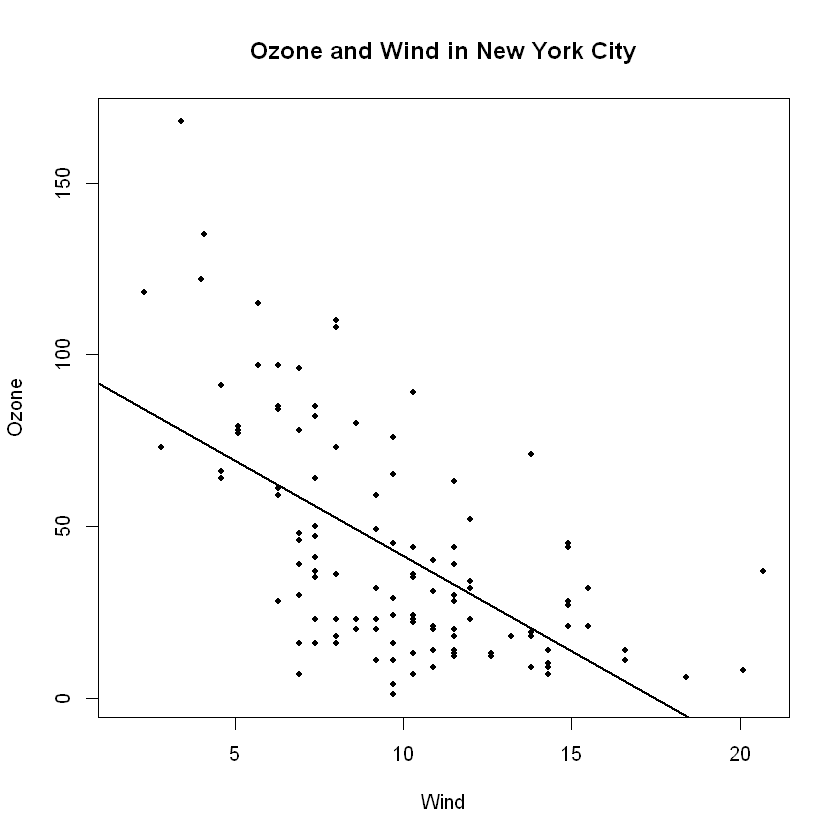

In [26]:
with(airquality,plot(Wind,Ozone,main="Ozone and Wind in New York City",pch = 20))
model <- lm(Ozone ~ Wind,airquality)
abline(model,lwd=2)

### Multiple Base Plots

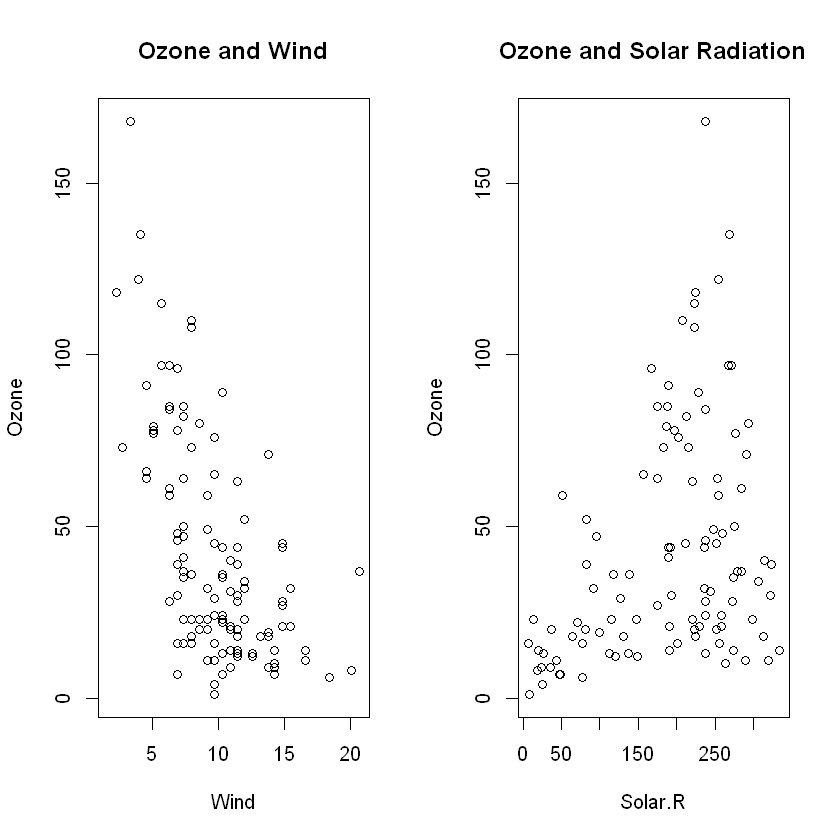

In [31]:
par(mfrow=c(1,2))
with(airquality,{
    plot(Wind,Ozone,main="Ozone and Wind")
    plot(Solar.R,Ozone,main="Ozone and Solar Radiation")
})

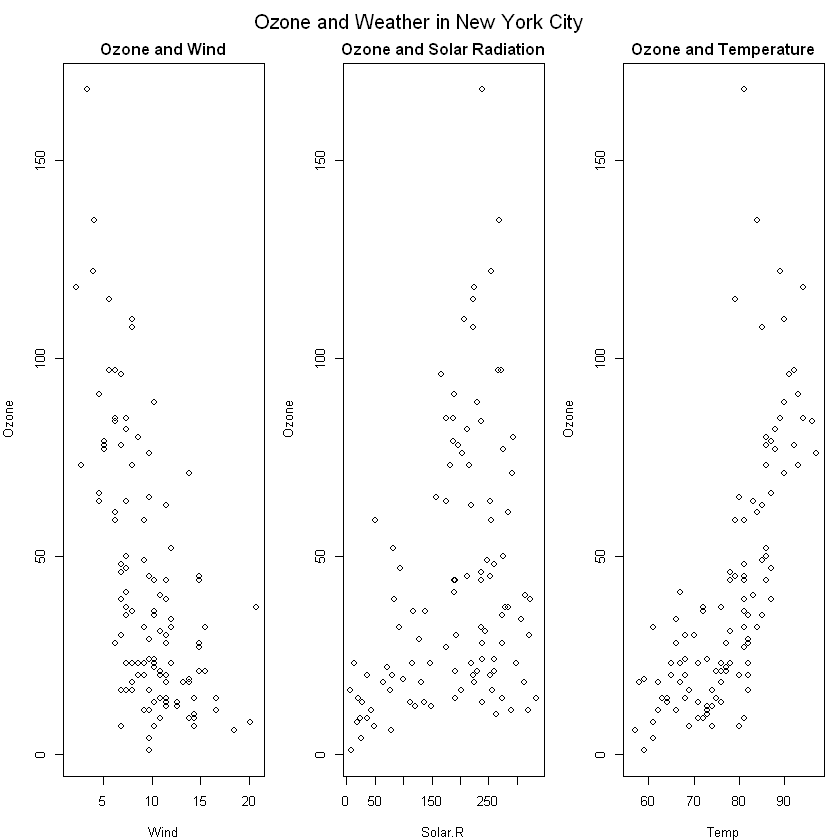

In [35]:
par(mfrow=c(1,3),mar=c(4,4,2,1),oma=c(0,0,2,0))
with(airquality,{
    plot(Wind,Ozone,main="Ozone and Wind")
    plot(Solar.R,Ozone,main="Ozone and Solar Radiation")
    plot(Temp,Ozone,main="Ozone and Temperature")
    mtext("Ozone and Weather in New York City",outer=TRUE)
})

## Base Plotting Demonstration

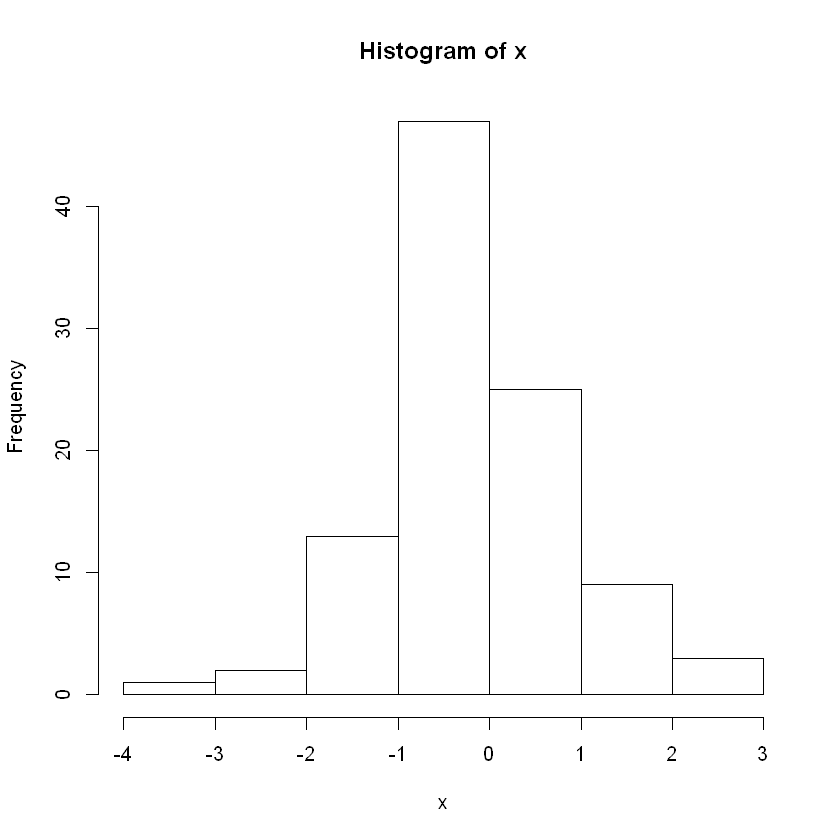

In [37]:
x <- rnorm(100)
hist(x)

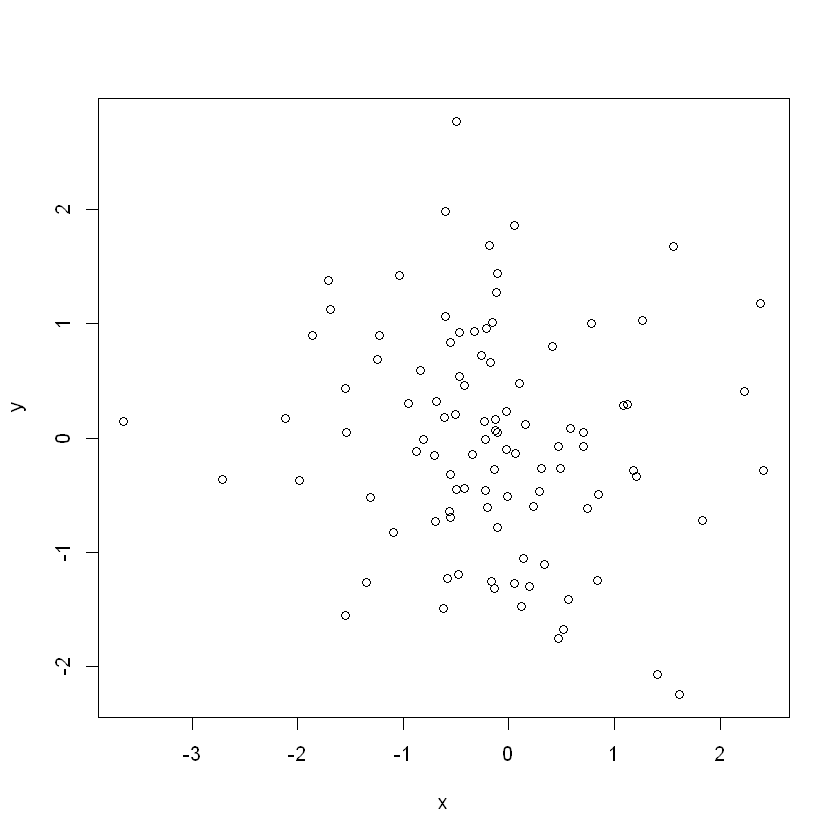

In [38]:
y <- rnorm(100)
plot(x,y)


points> require(stats) # for rnorm

points> plot(-4:4, -4:4, type = "n")  # setting up coord. system

points> points(rnorm(200), rnorm(200), col = "red")

points> points(rnorm(100)/2, rnorm(100)/2, col = "blue", cex = 1.5)

points> op <- par(bg = "light blue")

points> x <- seq(0, 2*pi, len = 51)

points> ## something "between type='b' and type='o'":
points> plot(x, sin(x), type = "o", pch = 21, bg = par("bg"), col = "blue", cex = .6,
points+  main = 'plot(..., type="o", pch=21, bg=par("bg"))')


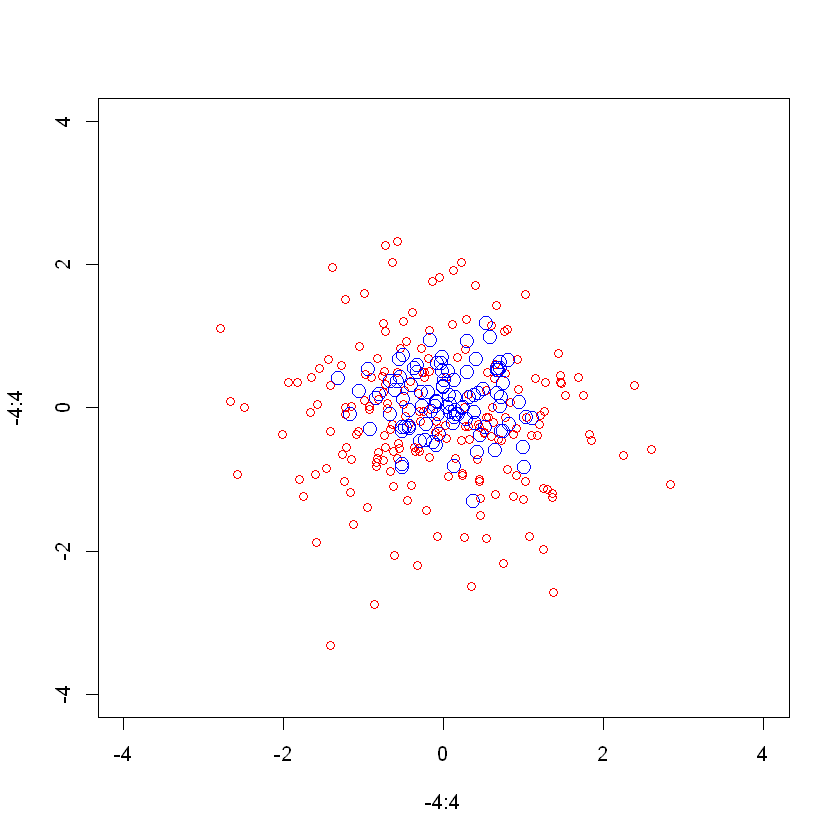


points> par(op)

points> ## Not run: 
points> ##D ## The figure was produced by calls like
points> ##D png("pch.png", height = 0.7, width = 7, res = 100, units = "in")
points> ##D par(mar = rep(0,4))
points> ##D plot(c(-1, 26), 0:1, type = "n", axes = FALSE)
points> ##D text(0:25, 0.6, 0:25, cex = 0.5)
points> ##D points(0:25, rep(0.3, 26), pch = 0:25, bg = "grey")
points> ## End(Not run)
points> 
points> ##-------- Showing all the extra & some char graphics symbols ---------
points> pchShow <-
points+   function(extras = c("*",".", "o","O","0","+","-","|","%","#"),
points+            cex = 3, ## good for both .Device=="postscript" and "x11"
points+            col = "red3", bg = "gold", coltext = "brown", cextext = 1.2,
points+            main = paste("plot symbols :  points (...  pch = *, cex =",
points+                         cex,")"))
points+   {
points+     nex <- length(extras)
points+     np  <- 26 + nex
points+     ipch <- 0:(np-1)
points+     k <- floor(sqrt(np))
points+     

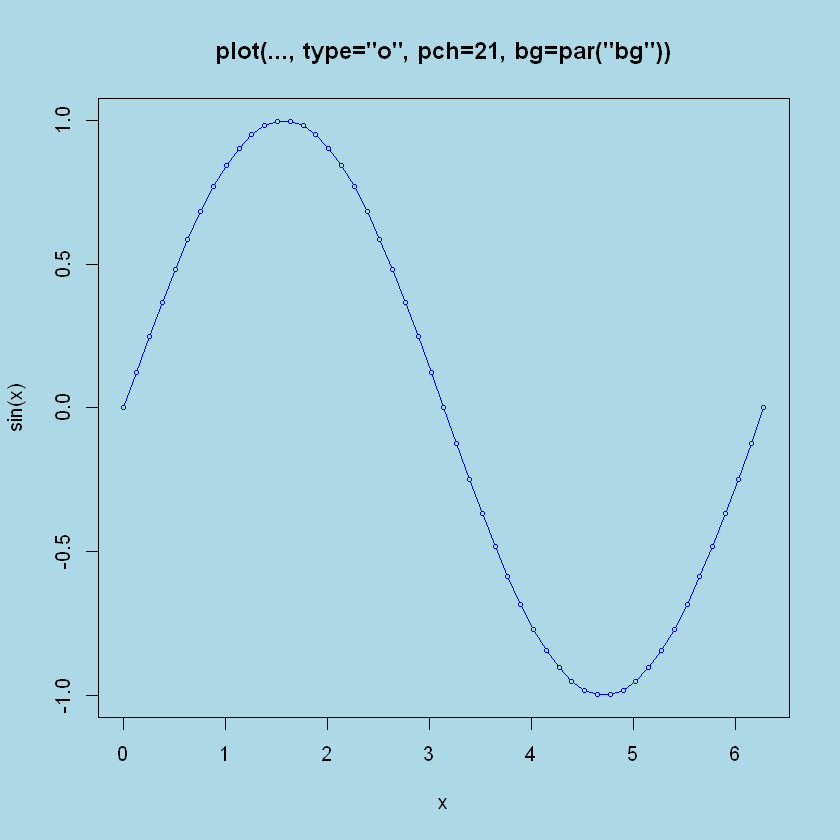


points> pchShow(c("o","O","0"), cex = 2.5)


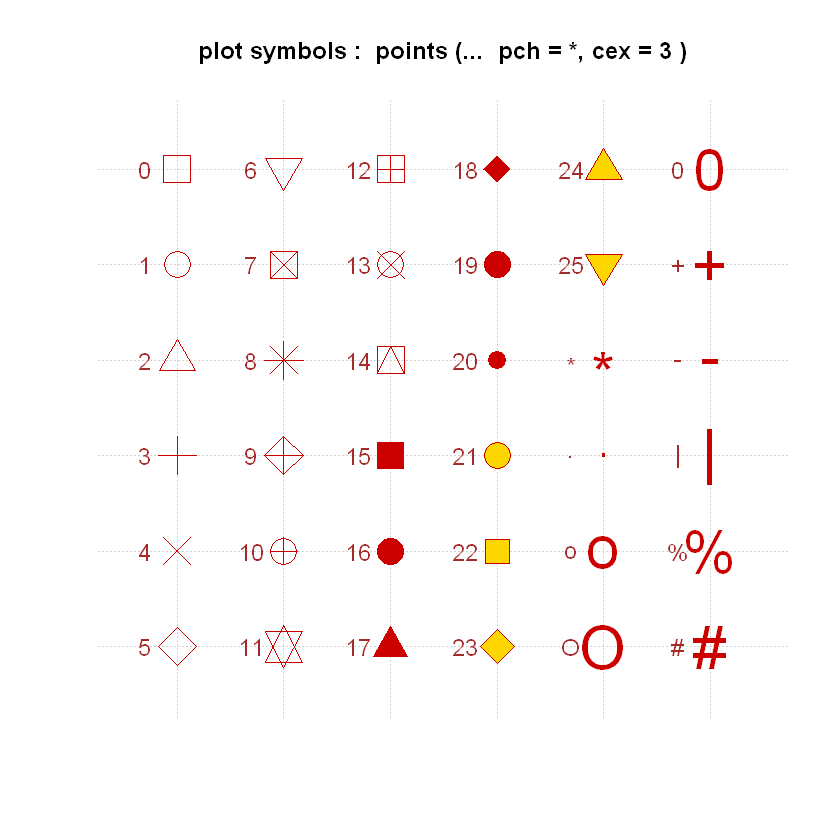


points> pchShow(NULL, cex = 4, cextext = 0, main = NULL)


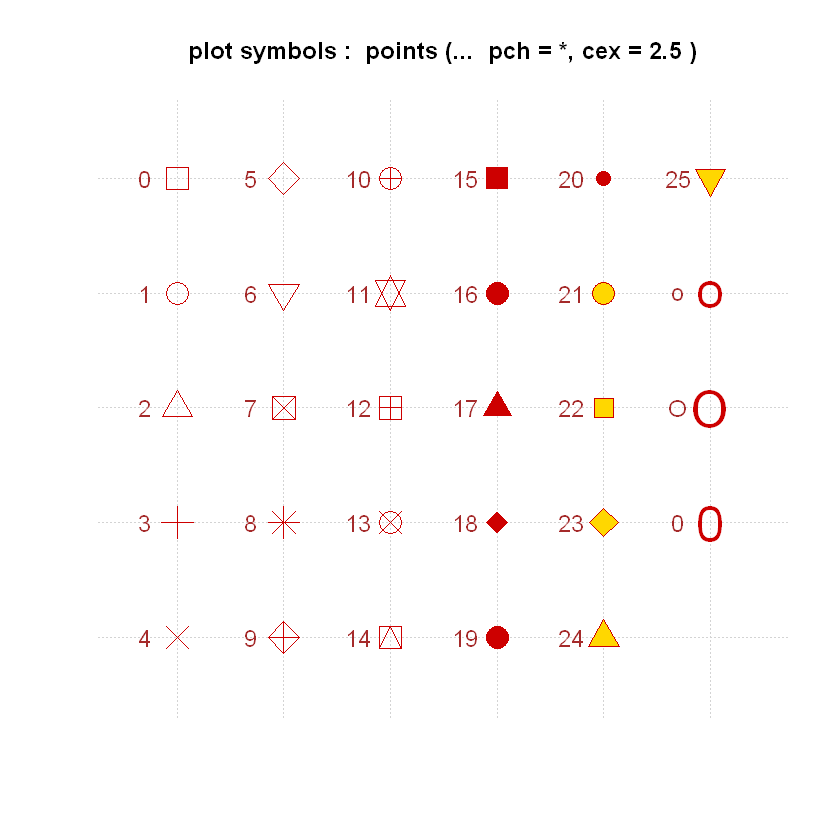


points> ## No test: 
points> ##D ## ------------ test code for various pch specifications -------------
points> ##D # Try this in various font families (including Hershey)
points> ##D # and locales.  Use sign = -1 asserts we want Latin-1.
points> ##D # Standard cases in a MBCS locale will not plot the top half.
points> ##D TestChars <- function(sign = 1, font = 1, ...)
points> ##D {
points> ##D    MB <- l10n_info()$MBCS
points> ##D    r <- if(font == 5) { sign <- 1; c(32:126, 160:254)
points> ##D        } else if(MB) 32:126 else 32:255
points> ##D    if (sign == -1) r <- c(32:126, 160:255)
points> ##D    par(pty = "s")
points> ##D    plot(c(-1,16), c(-1,16), type = "n", xlab = "", ylab = "",
points> ##D         xaxs = "i", yaxs = "i",
points> ##D         main = sprintf("sign = %d, font = %d", sign, font))
points> ##D    grid(17, 17, lty = 1) ; mtext(paste("MBCS:", MB))
points> ##D    for(i in r) try(points(i%%16, i%/%16, pch = sign*i, font = font,...))
points> ##D }
points> ##D TestCh

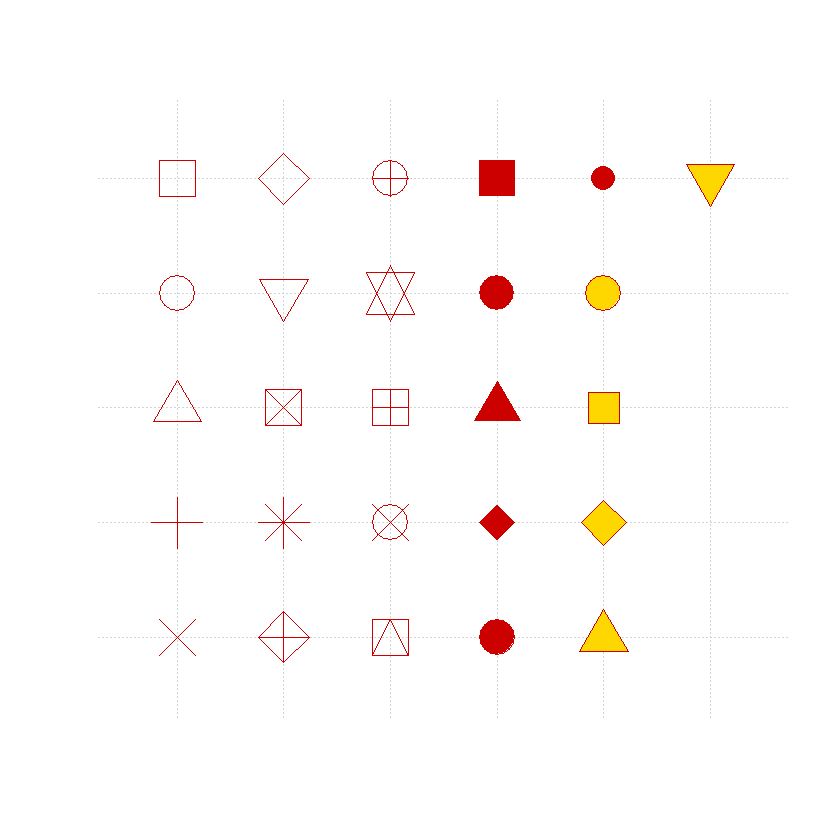

In [39]:
example(points)

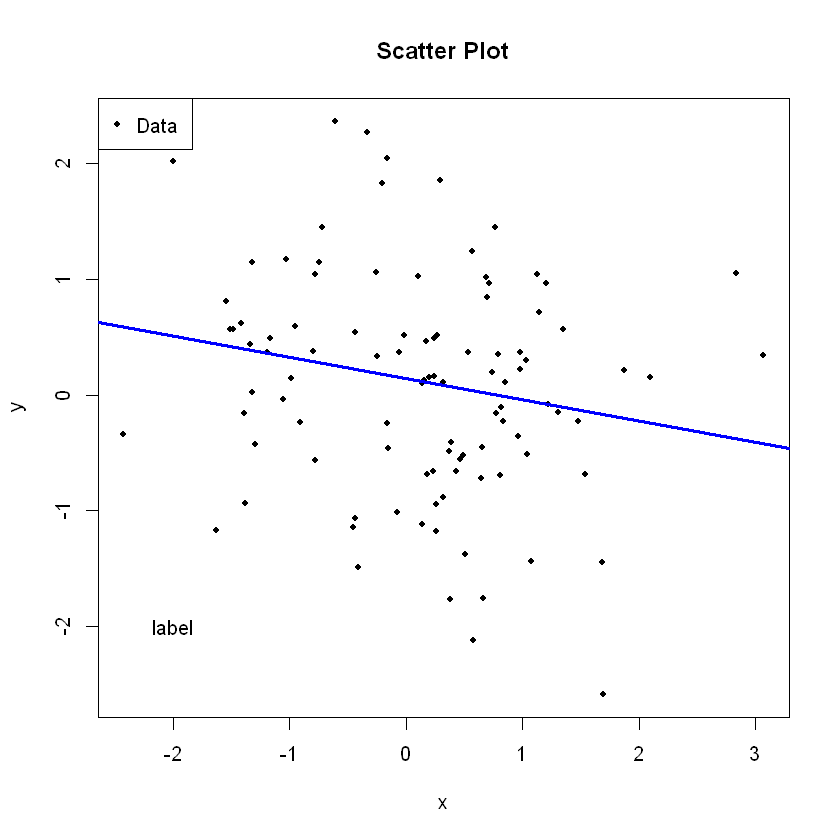

In [18]:
x <-rnorm(100)
y<-rnorm(100)
plot(x,y,pch = 20)
title('Scatter Plot')
text(-2,-2,"label")
legend("topleft",legend="Data")
legend("topleft",legend="Data",pch=20)
fit <-lm(x~y)
abline(fit,lwd=3,col="blue")

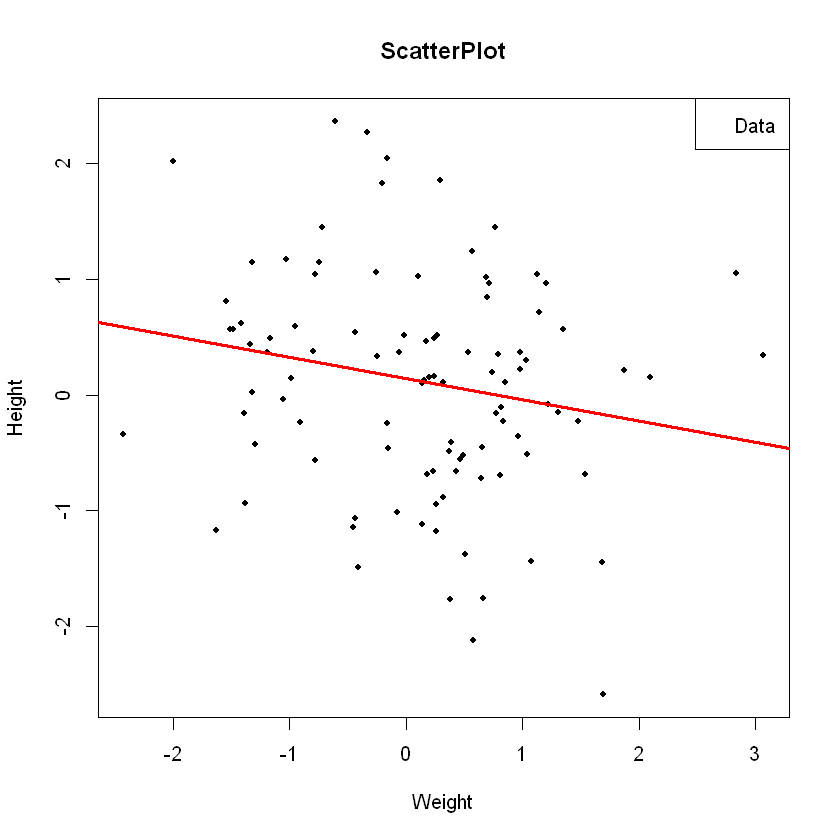

In [19]:
plot(x,y,xlab = "Weight",ylab="Height",main="ScatterPlot",pch=20)
legend("topright",legend="Data")
fit <- lm(x~y)
abline(fit,lwd=3,col="red")

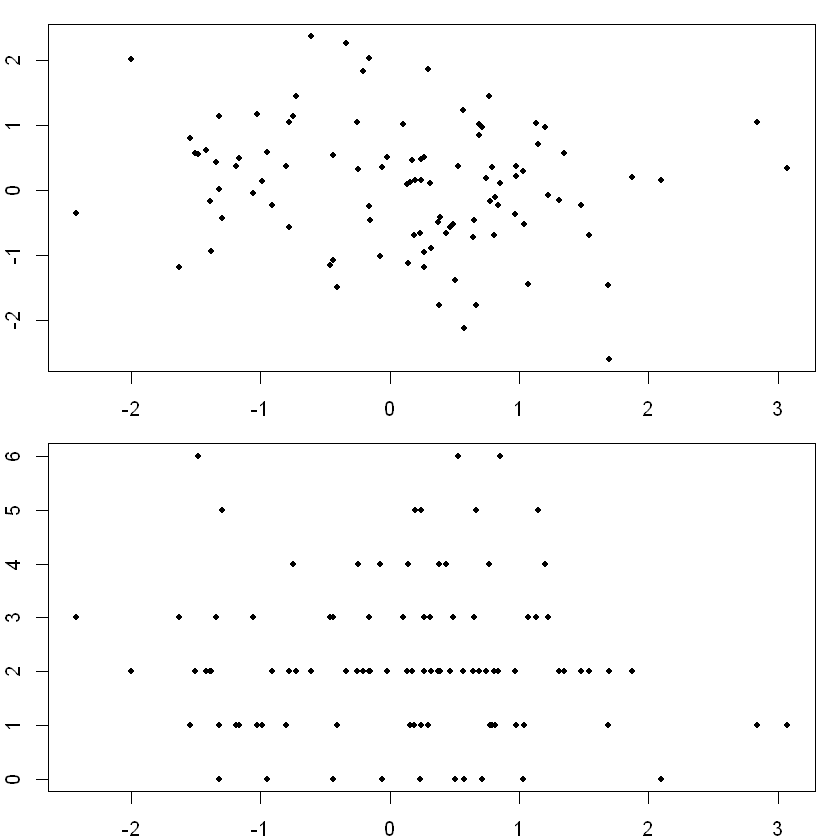

In [23]:
z<-rpois(100,2)
par(mfrow=c(2,1),mar =c(2,2,1,1))
plot(x,y,pch=20)
plot(x,z,pch=20)

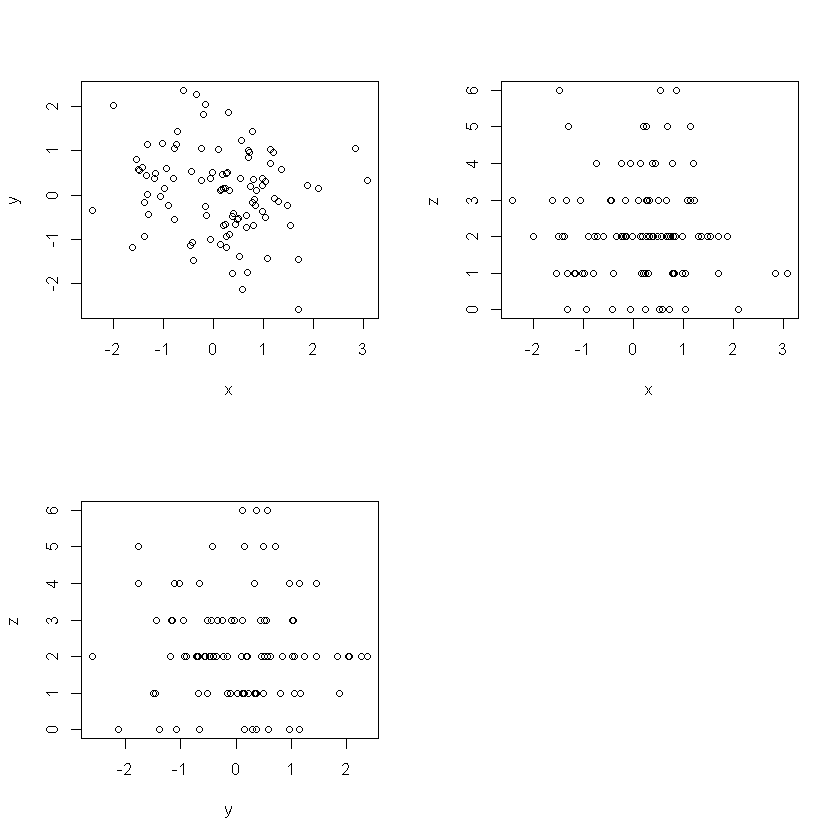

In [25]:
par(mfrow=c(2,2))
plot(x,y)
plot(x,z)
plot(y,z)

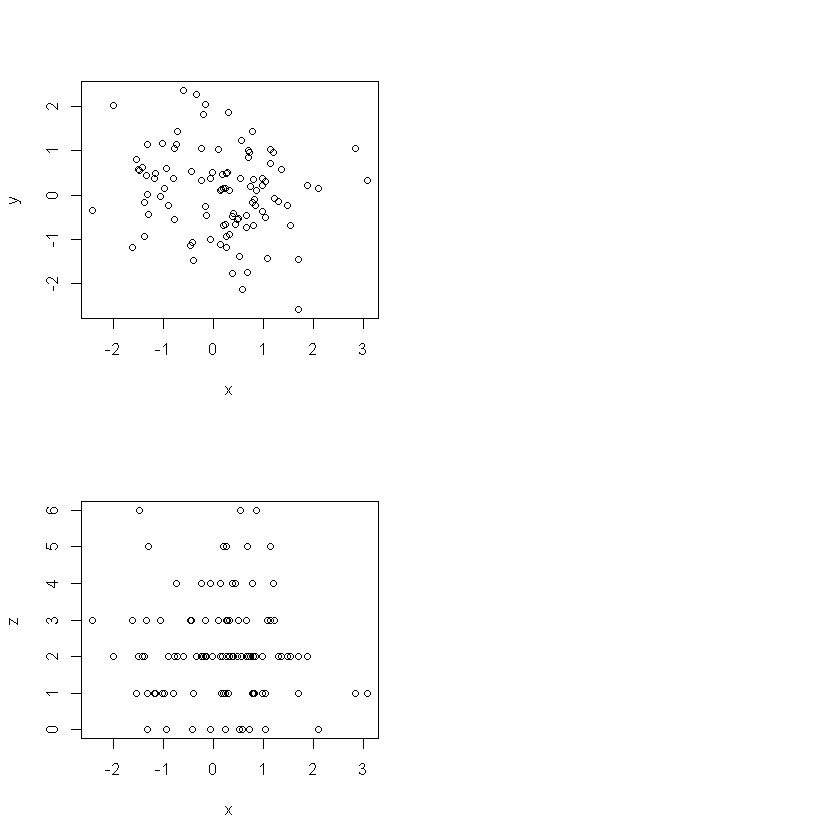

In [26]:
par(mfcol=c(2,2))
plot(x,y)
plot(x,z)

In [31]:
g <- gl(2,50,labels = c("Male","Female"))
str(g)

 Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...


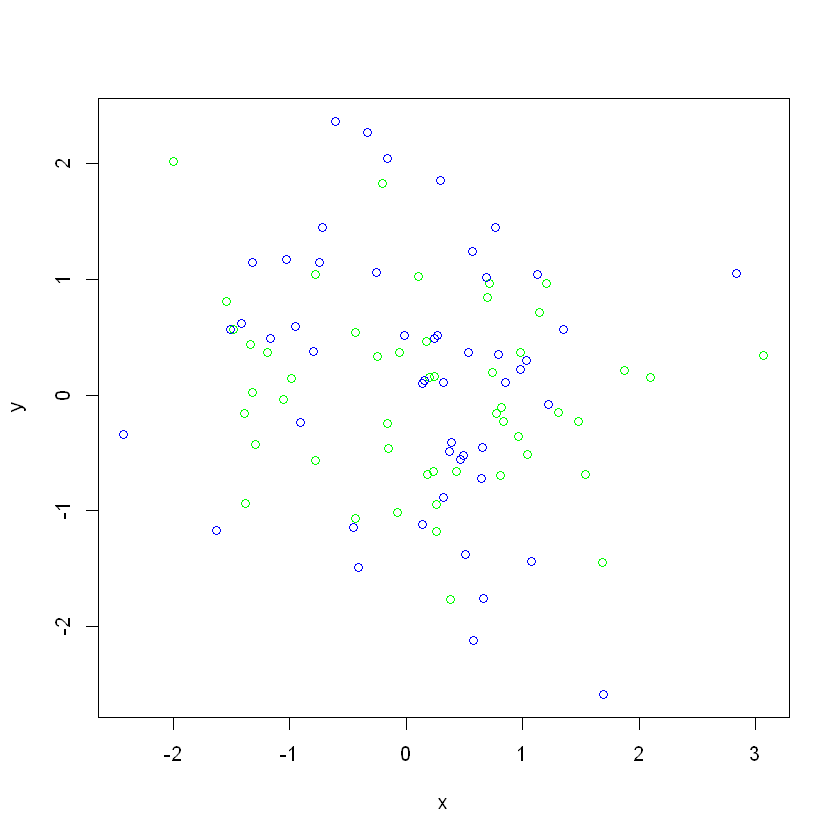

In [34]:
plot(x,y,type="n")
points(x[g=='Male'],y[g=='Male'],col='green')
points(x[g=='Female'],y[g=='Female'],col='blue')

## Graphic Devices

### Plot on a screen

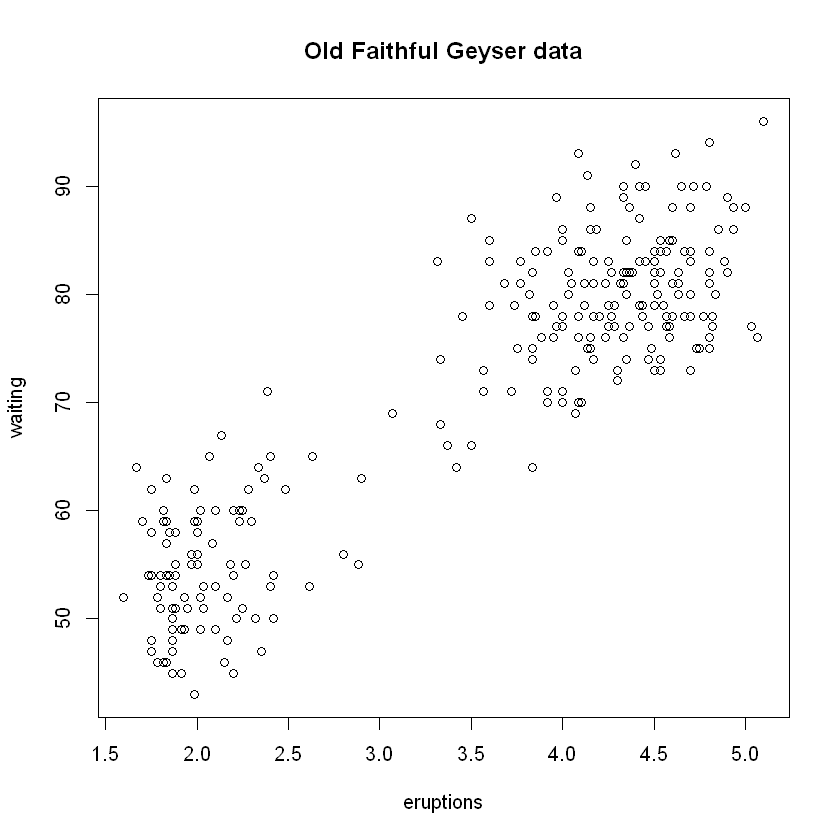

In [37]:
library(datasets)
with(faithful,plot(eruptions,waiting)) ## Make plot appear on screen device
title(main = "Old Faithful Geyser data") ## Annotate with a title

### Plot on pdf file

In [44]:
pdf(file="myplot.pdf")
with(faithful,plot(eruptions,waiting))
title(main="Old Faithful Geyser data")
dev.off()

png 
  2

In [45]:
dev.cur()

png 
  2

### Copying plots

png 
  3

png 
  2

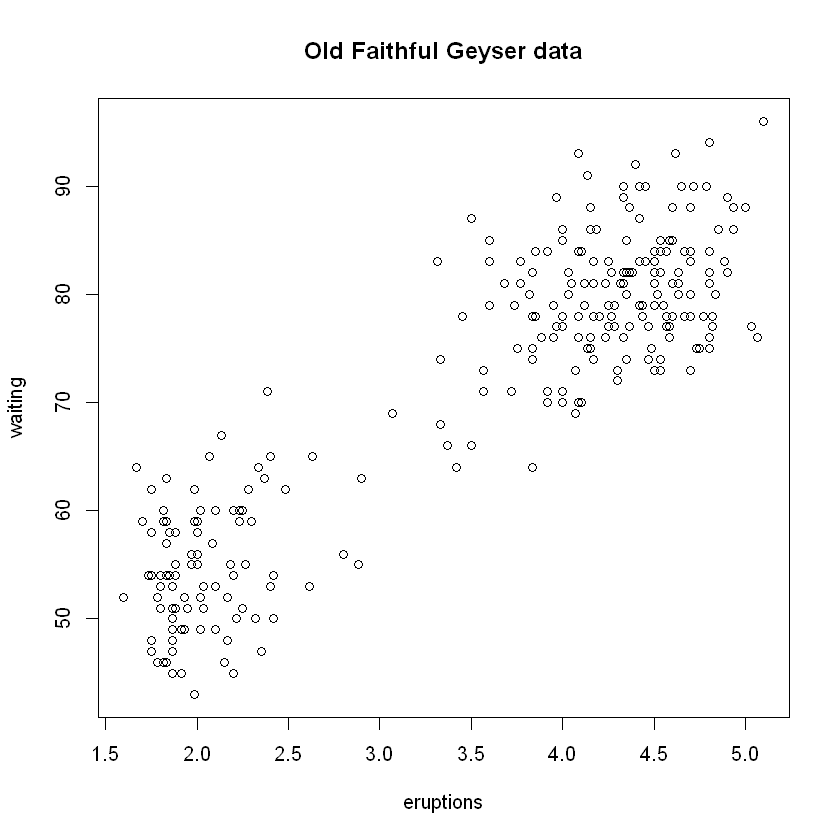

In [47]:
library(datasets)
with(faithful,plot(eruptions,waiting))
title(main="Old Faithful Geyser data")
dev.copy(png,file="geyserplot.png")
dev.off()